# Predicting Factors Influencing Student Academic Performance


In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split ,cross_val_score , StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report ,accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [204]:
df=pd.read_csv('24251325_Joyston.csv')
df.head()

,Gender,School Type,Studies Daily,Attends Extra Classes,Uses Online Learning Platforms,Has a Fixed Study Schedule,Participates in Group Study,Sleeps at Least 7 Hours,Uses Social Media During Study Hours,Submits Assignments on Time,...,Uses a Tutor,Prefers Studying Alone,Attends School Regularly,Has a Part-time Job,Uses a Planner for Schoolwork,Gets Nervous Before Exams,Prefers Online Classes Over In-person,Takes Notes in Class,Has a Quiet Study Environment at Home,High Performer
0,Female,Private,Yes,No,Yes,No,Yes,No,No,Yes,...,No,No,No,No,No,Yes,Yes,Yes,No,No
1,Male,Public,Yes,No,Yes,Yes,Yes,Yes,No,Yes,...,No,No,No,Yes,Yes,No,No,No,No,Yes
2,Female,Private,Yes,No,Yes,No,No,Yes,Yes,No,...,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No
3,Male,Public,No,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,No,No,Yes,Yes,No,Yes,Yes,Yes,No
4,Female,Public,Yes,No,Yes,Yes,Yes,No,Yes,Yes,...,No,Yes,No,Yes,Yes,No,No,Yes,No,Yes


In [205]:
df.isnull().sum()

Gender                                   0
School Type                              0
Studies Daily                            0
Attends Extra Classes                    0
Uses Online Learning Platforms           0
Has a Fixed Study Schedule               0
Participates in Group Study              0
Sleeps at Least 7 Hours                  0
Uses Social Media During Study Hours     0
Submits Assignments on Time              0
Enjoys Reading                           0
Participates in School Activities        0
Uses a Tutor                             0
Prefers Studying Alone                   0
Attends School Regularly                 0
Has a Part-time Job                      0
Uses a Planner for Schoolwork            0
Gets Nervous Before Exams                0
Prefers Online Classes Over In-person    0
Takes Notes in Class                     0
Has a Quiet Study Environment at Home    0
High Performer                           0
dtype: int64

# Encoding into numeric

In [206]:
# Encode categorical variables to numeric using Label Encoding

df_encoded = df.copy()
label_encoders = {}
for column in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le
df_encoded

,Gender,School Type,Studies Daily,Attends Extra Classes,Uses Online Learning Platforms,Has a Fixed Study Schedule,Participates in Group Study,Sleeps at Least 7 Hours,Uses Social Media During Study Hours,Submits Assignments on Time,...,Uses a Tutor,Prefers Studying Alone,Attends School Regularly,Has a Part-time Job,Uses a Planner for Schoolwork,Gets Nervous Before Exams,Prefers Online Classes Over In-person,Takes Notes in Class,Has a Quiet Study Environment at Home,High Performer
0,0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,0,1,1,1,0,0
1,1,1,1,0,1,1,1,1,0,1,...,0,0,0,1,1,0,0,0,0,1
2,0,0,1,0,1,0,0,1,1,0,...,0,1,1,0,1,1,0,1,1,0
3,1,1,0,1,1,0,1,1,1,1,...,0,0,0,1,1,0,1,1,1,0
4,0,1,1,0,1,1,1,0,1,1,...,0,1,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0,1,0,1,0,0,0,0,1,1,...,0,0,0,0,1,1,0,0,1,1
306,1,1,0,1,0,1,1,1,1,1,...,1,1,1,0,1,0,1,0,0,1
307,0,1,0,0,1,0,1,1,0,1,...,0,0,0,1,0,0,1,1,1,1
308,0,0,0,1,0,1,0,1,1,1,...,0,1,0,0,0,0,0,1,0,1


# "N0" ecoded as 0

# "Yes" encoded as 1

In [207]:
df_encoded.head(10)

,Gender,School Type,Studies Daily,Attends Extra Classes,Uses Online Learning Platforms,Has a Fixed Study Schedule,Participates in Group Study,Sleeps at Least 7 Hours,Uses Social Media During Study Hours,Submits Assignments on Time,...,Uses a Tutor,Prefers Studying Alone,Attends School Regularly,Has a Part-time Job,Uses a Planner for Schoolwork,Gets Nervous Before Exams,Prefers Online Classes Over In-person,Takes Notes in Class,Has a Quiet Study Environment at Home,High Performer
0,0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,0,1,1,1,0,0
1,1,1,1,0,1,1,1,1,0,1,...,0,0,0,1,1,0,0,0,0,1
2,0,0,1,0,1,0,0,1,1,0,...,0,1,1,0,1,1,0,1,1,0
3,1,1,0,1,1,0,1,1,1,1,...,0,0,0,1,1,0,1,1,1,0
4,0,1,1,0,1,1,1,0,1,1,...,0,1,0,1,1,0,0,1,0,1
5,1,1,1,1,1,0,0,1,1,1,...,1,1,1,0,0,0,0,0,1,0
6,1,1,1,1,0,1,0,0,0,1,...,0,1,1,1,1,0,0,0,1,1
7,1,0,0,1,0,1,1,0,0,0,...,1,1,1,0,1,1,0,1,1,0
8,0,0,0,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,1,1,0
9,0,1,1,0,0,0,1,1,1,1,...,1,1,0,0,1,1,0,1,0,0


In [208]:
# Check skewness
skewed_columns = df.skew(numeric_only=True)
print("Skewness:\n", skewed_columns)

Skewness:
 Series([], dtype: float64)


In [209]:
# Check skewness for each encoded feature
skewness = df_encoded.drop(columns=['High Performer']).skew()

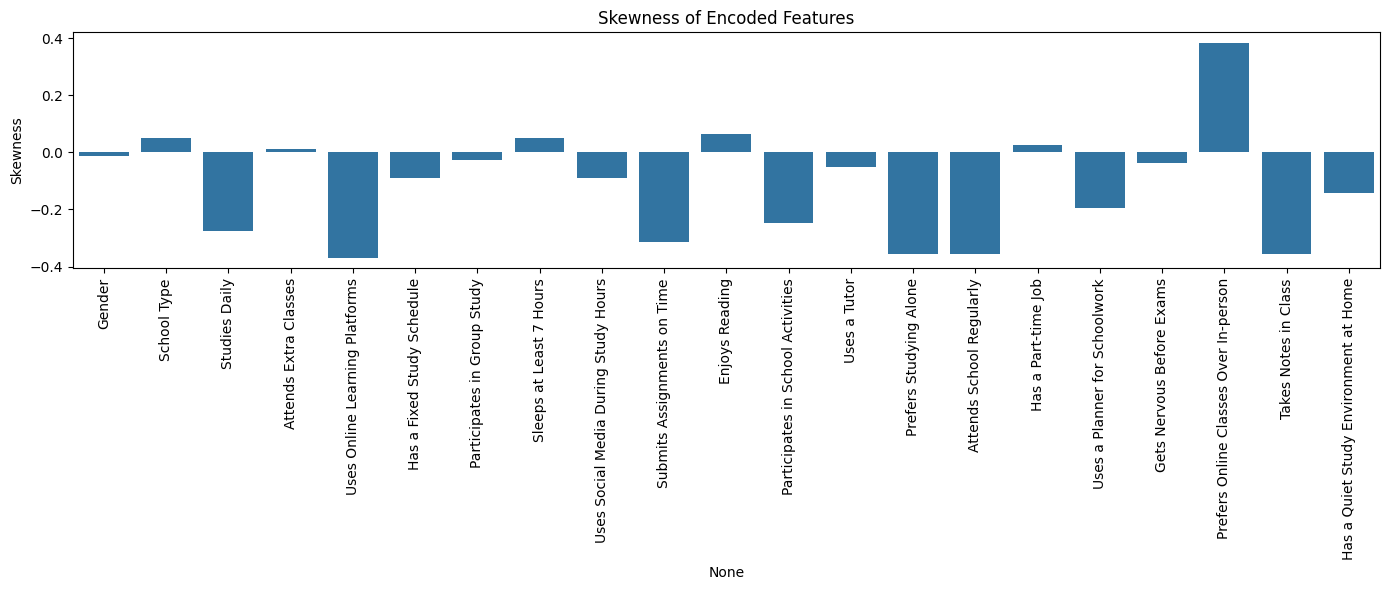

In [210]:
# Visualize skewness
plt.figure(figsize=(14, 6))
sns.barplot(x=skewness.index, y=skewness.values)
plt.title("Skewness of Encoded Features")
plt.xticks(rotation=90)
plt.ylabel("Skewness")
plt.tight_layout()
plt.show()

In [211]:
x=df_encoded.drop(columns=['High Performer'])
y=df_encoded['High Performer']

In [212]:
X_train, X_test, y_train, y_test = train_test_split(x, y,train_size=0.8, test_size=0.2, random_state=42)

In [213]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled

,Gender,School Type,Studies Daily,Attends Extra Classes,Uses Online Learning Platforms,Has a Fixed Study Schedule,Participates in Group Study,Sleeps at Least 7 Hours,Uses Social Media During Study Hours,Submits Assignments on Time,...,Participates in School Activities,Uses a Tutor,Prefers Studying Alone,Attends School Regularly,Has a Part-time Job,Uses a Planner for Schoolwork,Gets Nervous Before Exams,Prefers Online Classes Over In-person,Takes Notes in Class,Has a Quiet Study Environment at Home
0,0,1,1,0,0,0,0,1,1,1,...,1,0,1,1,0,0,1,0,1,0
1,1,1,1,0,0,1,1,1,0,0,...,1,1,0,1,0,1,0,1,1,1
2,1,1,1,1,0,1,0,0,1,0,...,1,1,0,1,0,0,0,0,1,1
3,0,0,1,0,0,1,0,0,0,1,...,0,1,0,1,0,0,1,1,1,0
4,0,0,1,0,0,1,0,0,1,0,...,1,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,1,0,1,1,1,1,1,0,1,1,...,0,0,1,1,1,0,1,1,0,0
286,0,1,1,0,1,0,1,1,1,0,...,1,0,1,0,1,0,0,0,0,0
287,0,1,1,0,0,1,0,1,0,1,...,1,1,0,1,0,0,1,0,0,1
288,0,0,0,0,1,1,0,0,0,1,...,0,0,0,1,0,1,1,0,1,1


In [214]:
y_train_resampled

0      0
1      1
2      1
3      1
4      0
      ..
285    0
286    0
287    0
288    0
289    0
Name: High Performer, Length: 290, dtype: int64

In [215]:
smote

SMOTE(random_state=42)

In [216]:
print("Before resampling:")
print(pd.Series(y_train).value_counts())

# Check class distribution after resampling
print("\nAfter resampling:")
print(pd.Series(y_train_resampled).value_counts())


Before resampling:
High Performer
1    145
0    103
Name: count, dtype: int64

After resampling:
High Performer
0    145
1    145
Name: count, dtype: int64


In [217]:
scaler = StandardScaler()
#scaler.fit(X_train_resampled)
x_train_scale=scaler.fit_transform(X_train_resampled)
#x_train_scale=scaler.transform(X_train_resampled)
X_test_scale=scaler.transform(X_test)

# LogisticRegression

In [218]:
# Step 7: Train Logistic Regression 
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train_scale, y_train_resampled )

LogisticRegression(max_iter=1000)

In [219]:
#logistic
pred=log_model.predict(X_test_scale)

Confusion Matrix: 
 [[17 10]
 [14 21]]


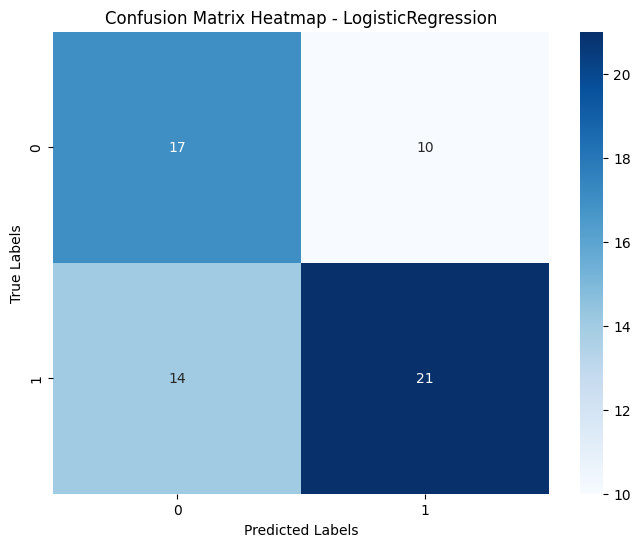

In [220]:
#logistic
print("Confusion Matrix: \n",confusion_matrix(y_test,pred))

cm = confusion_matrix(y_test, pred)
cm

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - LogisticRegression')
plt.show()


In [221]:
report = classification_report(y_test, pred, output_dict=True)
accuracy = report['accuracy']  # Accuracy is directly available in the dictionary
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.61


In [222]:
#logistic
print("=== LogisticRegression Results ===")
print(classification_report(y_test,pred))

=== LogisticRegression Results ===
              precision    recall  f1-score   support

           0       0.55      0.63      0.59        27
           1       0.68      0.60      0.64        35

    accuracy                           0.61        62
   macro avg       0.61      0.61      0.61        62
weighted avg       0.62      0.61      0.61        62



In [223]:
cv_scores = cross_val_score(log_model, X_train_resampled , y_train_resampled , cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.round(np.mean(cv_scores), 2))


Cross-Validation Scores: [0.5862069  0.5        0.63793103 0.70689655 0.67241379]
Mean CV Score: 0.62


In [224]:
cv_scores = cross_val_score(log_model, X_train_resampled , y_train_resampled , cv=10, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.round(np.mean(cv_scores), 2))

Cross-Validation Scores: [0.5862069  0.51724138 0.48275862 0.37931034 0.68965517 0.5862069
 0.68965517 0.62068966 0.75862069 0.65517241]
Mean CV Score: 0.6


--------------------------------------------------------------------------------------------------------

## Logistic Regression accuracy is -- 0.61

## After Mean Cross Validation 5 Folds-- 0.62

## After Mean Cross Validation 10 Folds-- 0.60

--------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------

# RandomForestClassifier

In [225]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42) 
model.fit(x_train_scale, y_train_resampled)
model

RandomForestClassifier(random_state=42)

In [226]:
#randomforestclassifier
pred1=model.predict(X_test_scale)

Confusion Matrix: 
 [[20  7]
 [ 9 26]]


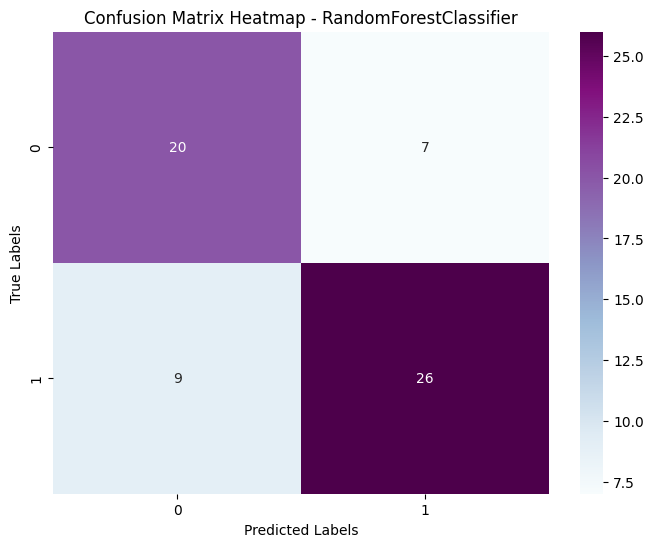

In [227]:
#randomforestclassifier
print("Confusion Matrix: \n", confusion_matrix(y_test,pred1))

cm = confusion_matrix(y_test, pred1)
cm

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - RandomForestClassifier')
plt.show()

In [228]:
report = classification_report(y_test, pred1, output_dict=True)
accuracy = report['accuracy']  
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74


In [229]:
#randomforestclassifier
print("=== RandomForestClassifier Results ===")
print(classification_report(y_test,pred1))

=== RandomForestClassifier Results ===
              precision    recall  f1-score   support

           0       0.69      0.74      0.71        27
           1       0.79      0.74      0.76        35

    accuracy                           0.74        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.75      0.74      0.74        62



In [230]:
cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled , cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.round(np.mean(cv_scores), 2))

Cross-Validation Scores: [0.79310345 0.74137931 0.82758621 0.87931034 0.96551724]
Mean CV Accuracy: 0.84


In [231]:
cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled , cv=10, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.round(np.mean(cv_scores), 2))

Cross-Validation Scores: [0.89655172 0.79310345 0.79310345 0.79310345 0.79310345 0.89655172
 0.86206897 0.93103448 0.96551724 0.96551724]
Mean CV Accuracy: 0.87


--------------------------------------------------------------------------------------------------------

## Random Forest Classifier accuracy --- 0.74

## After Mean Cross validation 5 Folds -- 0.84

## After Mean Cross validation 10 Folds -- 0.87

--------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------

# SVM

In [232]:
svm_model = SVC(kernel='rbf')
svm_model.fit(x_train_scale, y_train_resampled)
svm_model

SVC()

In [233]:
#svm
svm_pred = svm_model.predict(X_test_scale)

Confusion Matrix: 
 [[19  8]
 [ 7 28]]


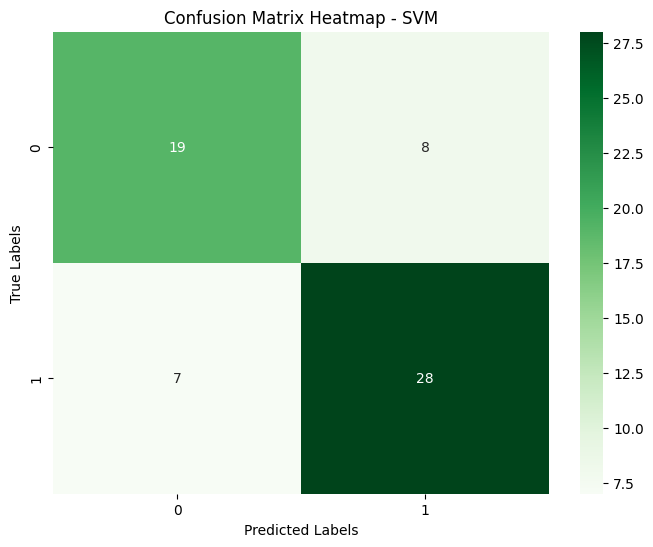

In [234]:
#svm
print("Confusion Matrix: \n",confusion_matrix(y_test,svm_pred))

cm = confusion_matrix(y_test, svm_pred)
cm

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - SVM')
plt.show()

In [235]:
report = classification_report(y_test, svm_pred, output_dict=True)
accuracy = report['accuracy']  
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.76


In [236]:
#svm
print("=== SVM Results ===")
print(classification_report(y_test,svm_pred))

=== SVM Results ===
              precision    recall  f1-score   support

           0       0.73      0.70      0.72        27
           1       0.78      0.80      0.79        35

    accuracy                           0.76        62
   macro avg       0.75      0.75      0.75        62
weighted avg       0.76      0.76      0.76        62



In [237]:
cv_scores = cross_val_score(svm_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.round(np.mean(cv_scores), 2))

Cross-Validation Scores: [0.81034483 0.70689655 0.82758621 0.9137931  0.93103448]
Mean CV Accuracy: 0.84


In [238]:
cv_scores = cross_val_score(svm_model, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.round(np.mean(cv_scores), 2))

Cross-Validation Scores: [0.82758621 0.75862069 0.72413793 0.65517241 0.75862069 0.86206897
 0.82758621 0.93103448 0.89655172 0.96551724]
Mean CV Accuracy: 0.82


--------------------------------------------------------------------------------------------------------

## SVM Accuracy -- 0.76

## After Mean Cross validation 5 folds -- 0.84

## After Mean Cross validation 10 folds -- 0.82

-----------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------

# MLPClassifier

In [239]:
# y_train
mlp_model = MLPClassifier(hidden_layer_sizes=[100,100,100], max_iter=1000, random_state=42)
mlp_model.fit(x_train_scale, y_train_resampled)
mlp_model


MLPClassifier(hidden_layer_sizes=[100, 100, 100], max_iter=1000,
              random_state=42)

In [240]:
mlp_pred = mlp_model.predict(X_test_scale)

Confusion Matrix: 
 [[20  7]
 [ 8 27]]


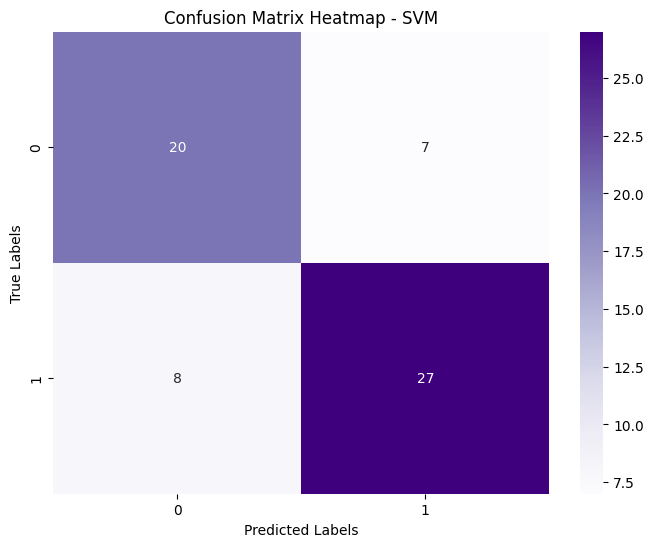

In [241]:
print("Confusion Matrix: \n",confusion_matrix(y_test,mlp_pred))

cm = confusion_matrix(y_test, mlp_pred)
cm

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - SVM')
plt.show()

In [242]:
report = classification_report(y_test, mlp_pred, output_dict=True)
accuracy = report['accuracy']  # Accuracy is directly available in the dictionary
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.76


In [243]:
print("=== MLPClassifier Results ===")
print("Classification Report:\n", classification_report(y_test, mlp_pred))

=== MLPClassifier Results ===
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.73        27
           1       0.79      0.77      0.78        35

    accuracy                           0.76        62
   macro avg       0.75      0.76      0.75        62
weighted avg       0.76      0.76      0.76        62



In [244]:
cv_scores = cross_val_score(mlp_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.round(np.mean(cv_scores),2))

Cross-Validation Scores: [0.82758621 0.77586207 0.86206897 0.89655172 0.93103448]
Mean CV Accuracy: 0.86


In [245]:
cv_scores = cross_val_score(mlp_model, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.round(np.mean(cv_scores), 2))

Cross-Validation Scores: [0.93103448 0.79310345 0.75862069 0.82758621 0.82758621 0.86206897
 0.86206897 0.89655172 0.93103448 0.93103448]
Mean CV Accuracy: 0.86


--------------------------------------------------------------------------------------------------------

## MLP Classifier Acuraccy -- 0.76

## After Mean Cross validation 5 folds -- 0.86

## After Mean Cross validation 10 folds -- 0.86

--------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------------------------------

## Model Comparison

| Model                   | Test Accuracy | Mean CV Accuracy (5-Fold) | Mean CV Accuracy (10-Fold) |
| ----------------------- | ------------- | ------------------------- | -------------------------- |
| **Logistic Regression** | 0.61          | 0.62                      | 0.60                       |
| **Random Forest**       | 0.74          | **0.84**                  | **0.87**                   |
| **SVM**                 | 0.76          | 0.84                      | 0.82                       |
| **MLP Classifier**      | 0.76          | **0.86**                  | **0.86**                   |


----------------------------------------------------------------------------------------------------------------------------------------

# Best Performing Model

## Random Forest Classifier
•	Has the highest 10-fold CV accuracy at 0.87

•	Also very strong in 5-fold CV (0.84), and solid test accuracy (0.74)


----------------------------------------------------------------------------------------------------------------------------------------

# Conclusion

## Random Forest Classifier
•	Random Forest is the best overall model

•	It consistently outperforms the others across all evaluation metrics

•   Random Forest is recommended as the most effective and reliable model for 
      identifying factors influencing student performance

----------------------------------------------------------------------------------------------------------------------------------------

## ==============THANK YOU==============

----------------------------------------------------------------------------------------------------------------------------------------